In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_image(image, nrows, ncols, index, title):
    plt.subplot(nrows, ncols, index)
    plt.title(title)
    plt.imshow(image, cmap="gray")

In [2]:
def ideal_high_pass_filter(F, D0):
    M, N = F.shape
    P, Q = M, N
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            if D > D0:
                H[u, v] = 1
    return H * F

In [3]:
def gaussian_high_pass_filter(F, D0):
    M, N = F.shape
    P, Q = M, N
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 - np.exp((-(D**2)) / (2 * D0**2))
    return H * F

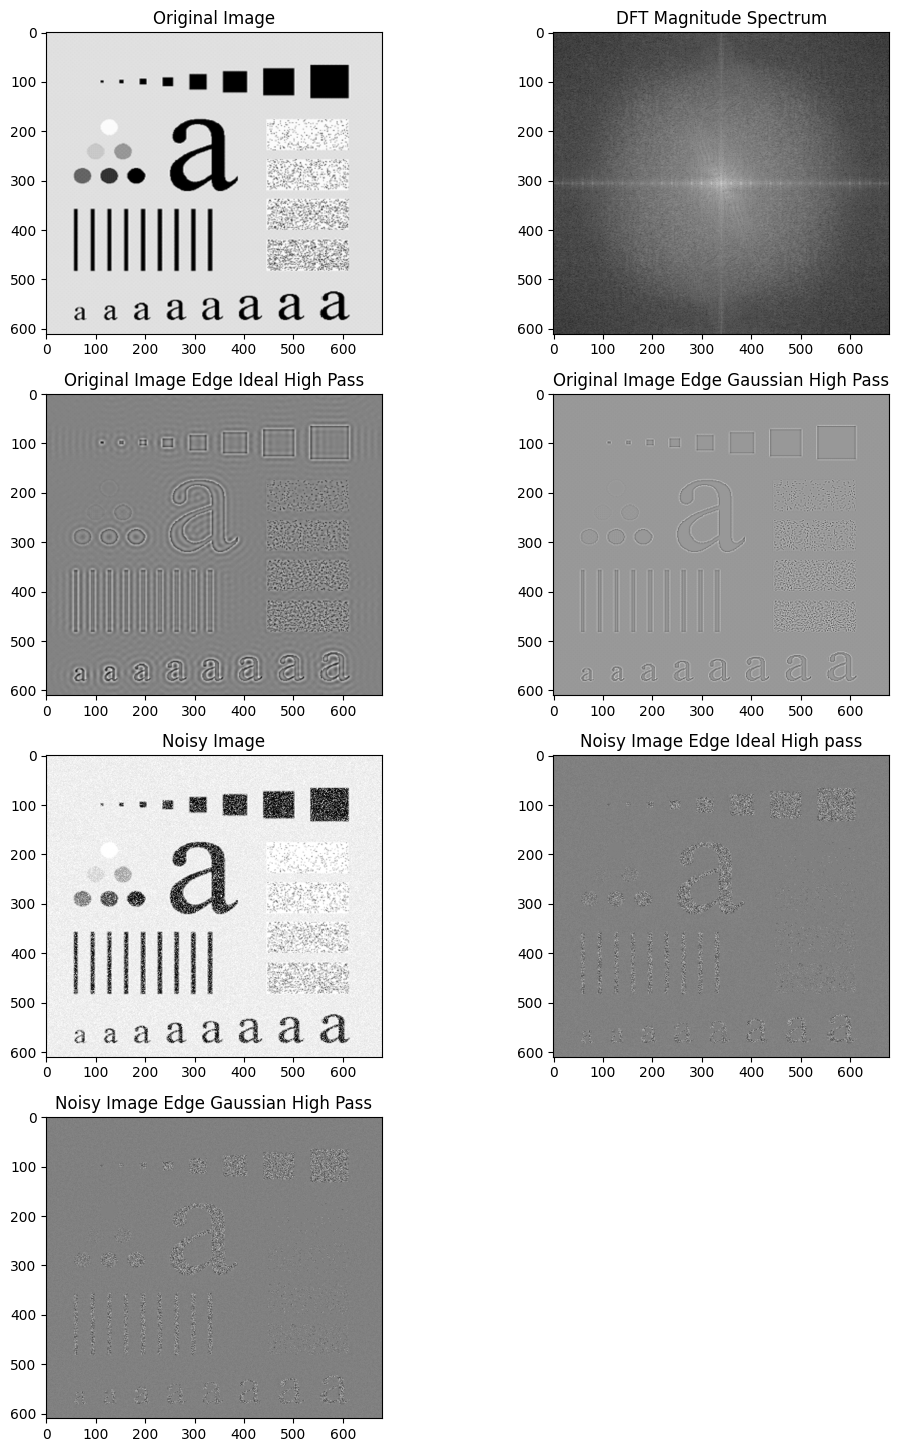

In [29]:
#import picture
original_image_bgr = cv2.imread("../SrcImage/filteringImage.jpg")
original_image = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)

fft_original_image = np.fft.fft2(original_image)
fft_shifted_original_image = np.fft.fftshift(fft_original_image)
magnitude_spectrum = np.log(np.abs(fft_shifted_original_image) + 1)

filtered_image_freq_domain = ideal_high_pass_filter(fft_shifted_original_image, 50)

reconstructed_image_shifted = np.fft.ifftshift(filtered_image_freq_domain)
reconstructed_image_shifted_fft = np.fft.ifft2(reconstructed_image_shifted).real

plt.figure(figsize=(12, 18))

plot_image(original_image, 4, 2, 1, "Original Image")
plot_image(magnitude_spectrum, 4, 2, 2, "DFT Magnitude Spectrum")
plot_image(reconstructed_image_shifted_fft, 4, 2, 3, "Original Image Edge Ideal High Pass")

filtered_image_freq_domain = gaussian_high_pass_filter(fft_shifted_original_image, 130)

reconstructed_image_shifted = np.fft.ifftshift(filtered_image_freq_domain)
reconstructed_image_shifted_fft = np.fft.ifft2(reconstructed_image_shifted).real

plot_image(reconstructed_image_shifted_fft, 4, 2, 4, "Original Image Edge Gaussian High Pass")

# Generate Gaussian Noise
noise = np.random.normal(7, 10, (original_image.shape)).astype(dtype=np.uint8)

# Add noise to original image
noisy_image = cv2.add(original_image, noise)

fft_noisy_image = np.fft.fft2(noisy_image)
fft_noisy_image_shifted = np.fft.fftshift(fft_noisy_image)

filtered_image_freq_domain = ideal_high_pass_filter(fft_noisy_image, 10)

reconstructed_image_shifted = np.fft.ifftshift(filtered_image_freq_domain)
reconstructed_image_shifted_fft = np.fft.ifft2(reconstructed_image_shifted).real

plot_image(noisy_image, 4, 2, 5, "Noisy Image")
plot_image(reconstructed_image_shifted_fft, 4, 2, 6, "Noisy Image Edge Ideal High pass")

filtered_image_freq_domain = gaussian_high_pass_filter(fft_noisy_image, 15)

reconstructed_image_shifted = np.fft.ifftshift(filtered_image_freq_domain)
reconstructed_image_shifted_fft = np.fft.ifft2(reconstructed_image_shifted).real

plot_image(reconstructed_image_shifted_fft, 4, 2, 7, "Noisy Image Edge Gaussian High Pass")
